In [66]:
import pandas as pd

In [67]:
df = pd.read_csv(r'D\..\IT-Help-Desk.csv')
df.head(5)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction
0,1,1929,1 - Junior,50,Systems,Issue,2 - Normal,0 - Unassigned,3,1 - Unsatisfied
1,2,1587,2 - Regular,15,Software,Request,1 - Minor,1 - Low,5,1 - Unsatisfied
2,3,925,2 - Regular,15,Access/Login,Request,2 - Normal,0 - Unassigned,0,0 - Unknown
3,4,413,4 - Management,22,Systems,Request,2 - Normal,0 - Unassigned,20,0 - Unknown
4,5,318,1 - Junior,22,Access/Login,Request,2 - Normal,1 - Low,1,1 - Unsatisfied


In [68]:
df = df.drop(columns='ticket')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   requestor           100000 non-null  int64 
 1   RequestorSeniority  100000 non-null  object
 2   ITOwner             100000 non-null  int64 
 3   FiledAgainst        100000 non-null  object
 4   TicketType          100000 non-null  object
 5   Severity            100000 non-null  object
 6   Priority            100000 non-null  object
 7   daysOpen            100000 non-null  int64 
 8   Satisfaction        100000 non-null  object
dtypes: int64(3), object(6)
memory usage: 6.9+ MB


In [70]:
import numpy as np

cols = df.columns
all_outliers = []

for col in cols:
    if np.issubdtype(df[col].dtype, np.number):
        mean_val = df[col].mean()
        sd_val = df[col].std()
        z_scores = (df[col] - mean_val) / sd_val
        outliers = np.where((z_scores < -3) | (z_scores > 3))[0]
        all_outliers.extend(outliers)

# Get unique indices of all outliers
all_outliers = np.unique(all_outliers)

# Remove rows with outliers
df1 = df.drop(index=all_outliers).reset_index(drop=True)

# Display the cleaned DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98084 entries, 0 to 98083
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   requestor           98084 non-null  int64 
 1   RequestorSeniority  98084 non-null  object
 2   ITOwner             98084 non-null  int64 
 3   FiledAgainst        98084 non-null  object
 4   TicketType          98084 non-null  object
 5   Severity            98084 non-null  object
 6   Priority            98084 non-null  object
 7   daysOpen            98084 non-null  int64 
 8   Satisfaction        98084 non-null  object
dtypes: int64(3), object(6)
memory usage: 6.7+ MB


In [37]:
from sklearn.preprocessing import StandardScaler

# Separate numeric and non-numeric columns
numeric_columns = df1.select_dtypes(include='number')
non_numeric_columns = df1.select_dtypes(exclude='number')

# Scale numeric columns using StandardScaler from scikit-learn
scaler = StandardScaler()
scaled_numeric_columns = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns)

# Combine scaled numeric columns and non-numeric columns
df_s = pd.concat([scaled_numeric_columns, non_numeric_columns], axis=1)

# Display the resulting DataFrame
df_s.head()

,requestor,ITOwner,daysOpen,RequestorSeniority,FiledAgainst,TicketType,Severity,Priority,Satisfaction
0,1.610737,1.699388,-0.514379,1 - Junior,Systems,Issue,2 - Normal,0 - Unassigned,1 - Unsatisfied
1,1.018578,-0.729287,-0.206609,2 - Regular,Software,Request,1 - Minor,1 - Low,1 - Unsatisfied
2,-0.127648,-0.729287,-0.976033,2 - Regular,Access/Login,Request,2 - Normal,0 - Unassigned,0 - Unknown
3,-1.014156,-0.243552,2.101662,4 - Management,Systems,Request,2 - Normal,0 - Unassigned,0 - Unknown
4,-1.178644,-0.243552,-0.822149,1 - Junior,Access/Login,Request,2 - Normal,1 - Low,1 - Unsatisfied


In [71]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df_s['RequestorSeniority']= label_encoder.fit_transform(df_s['RequestorSeniority'])

In [72]:
df_s.head()

,requestor,ITOwner,daysOpen,RequestorSeniority,FiledAgainst,TicketType,Severity,Priority,Satisfaction
0,1.610737,1.699388,-0.514379,0,Systems,Issue,2,0,1
1,1.018578,-0.729287,-0.206609,1,Software,Request,1,1,1
2,-0.127648,-0.729287,-0.976033,1,Access/Login,Request,2,0,0
3,-1.014156,-0.243552,2.101662,3,Systems,Request,2,0,0
4,-1.178644,-0.243552,-0.822149,0,Access/Login,Request,2,1,1


In [73]:
df_s['Severity']= label_encoder.fit_transform(df_s['Severity'])
df_s.head()

,requestor,ITOwner,daysOpen,RequestorSeniority,FiledAgainst,TicketType,Severity,Priority,Satisfaction
0,1.610737,1.699388,-0.514379,0,Systems,Issue,2,0,1
1,1.018578,-0.729287,-0.206609,1,Software,Request,1,1,1
2,-0.127648,-0.729287,-0.976033,1,Access/Login,Request,2,0,0
3,-1.014156,-0.243552,2.101662,3,Systems,Request,2,0,0
4,-1.178644,-0.243552,-0.822149,0,Access/Login,Request,2,1,1


In [74]:
df_s['Priority']= label_encoder.fit_transform(df_s['Priority'])
df_s.head()

,requestor,ITOwner,daysOpen,RequestorSeniority,FiledAgainst,TicketType,Severity,Priority,Satisfaction
0,1.610737,1.699388,-0.514379,0,Systems,Issue,2,0,1
1,1.018578,-0.729287,-0.206609,1,Software,Request,1,1,1
2,-0.127648,-0.729287,-0.976033,1,Access/Login,Request,2,0,0
3,-1.014156,-0.243552,2.101662,3,Systems,Request,2,0,0
4,-1.178644,-0.243552,-0.822149,0,Access/Login,Request,2,1,1


In [75]:
df_s['Satisfaction']= label_encoder.fit_transform(df_s['Satisfaction'])
df_s.head()

,requestor,ITOwner,daysOpen,RequestorSeniority,FiledAgainst,TicketType,Severity,Priority,Satisfaction
0,1.610737,1.699388,-0.514379,0,Systems,Issue,2,0,1
1,1.018578,-0.729287,-0.206609,1,Software,Request,1,1,1
2,-0.127648,-0.729287,-0.976033,1,Access/Login,Request,2,0,0
3,-1.014156,-0.243552,2.101662,3,Systems,Request,2,0,0
4,-1.178644,-0.243552,-0.822149,0,Access/Login,Request,2,1,1


In [76]:
# Identify categorical variables
categorical_vars = df_s.select_dtypes(include='object').columns

# One-hot encode categorical variables using get_dummies
encoded_categorical = pd.get_dummies(df_s[categorical_vars], prefix=categorical_vars, drop_first=True)

# Select numeric variables
numerical_data = df_s.select_dtypes(exclude='object')

# Combine numerical and encoded categorical data
df3 = pd.concat([numerical_data, encoded_categorical], axis=1)

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98084 entries, 0 to 98083
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   requestor              98084 non-null  float64
 1   ITOwner                98084 non-null  float64
 2   daysOpen               98084 non-null  float64
 3   RequestorSeniority     98084 non-null  int64  
 4   Severity               98084 non-null  int64  
 5   Priority               98084 non-null  int64  
 6   Satisfaction           98084 non-null  int64  
 7   FiledAgainst_Hardware  98084 non-null  uint8  
 8   FiledAgainst_Software  98084 non-null  uint8  
 9   FiledAgainst_Systems   98084 non-null  uint8  
 10  TicketType_Request     98084 non-null  uint8  
dtypes: float64(3), int64(4), uint8(4)
memory usage: 5.6 MB


In [77]:
df3.head()

,requestor,ITOwner,daysOpen,RequestorSeniority,Severity,Priority,Satisfaction,FiledAgainst_Hardware,FiledAgainst_Software,FiledAgainst_Systems,TicketType_Request
0,1.610737,1.699388,-0.514379,0,2,0,1,0,0,1,0
1,1.018578,-0.729287,-0.206609,1,1,1,1,0,1,0,1
2,-0.127648,-0.729287,-0.976033,1,2,0,0,0,0,0,1
3,-1.014156,-0.243552,2.101662,3,2,0,0,0,0,1,1
4,-1.178644,-0.243552,-0.822149,0,2,1,1,0,0,0,1


In [45]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [46]:
#df4 = df3.iloc[10:98084]

In [47]:
y = df3[['daysOpen']]

In [48]:
x = df3
x.drop(['daysOpen','requestor'], axis=1, inplace=True)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Multilinear Regression

In [19]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.model_selection import cross_val_score

# Assuming 'model' is already trained
scores = cross_val_score(model, x, y, cv=10)  # 'cv' specifies the number of folds for cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.55269927 0.55930104 0.55875729 0.55688288 0.55013163 0.55489546
 0.55833564 0.55459566 0.55244513 0.55659361]
Mean Cross-Validation Score: 0.5554637613931753


In [22]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, y_pred) 
print('R2 score is', r2)

R2 score is 0.5579962244099386


In [23]:
from sklearn import metrics
print(metrics.mean_squared_error(Y_test, y_pred))

0.44225811155041245


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [51]:
# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X_train, Y_train)

C:\Users\91773\AppData\Local\Temp/ipykernel_37420/3261123975.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, Y_train)


RandomForestRegressor(random_state=0)

In [52]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming 'model' is already trained
scores = cross_val_score(regressor, x, y, cv=10)  # 'cv' specifies the number of folds for cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())

C:\Users\91773\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [53]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

0.7708350652401622

In [54]:
from sklearn import metrics
print(metrics.mean_squared_error(Y_test, y_pred))

0.22929679988629081


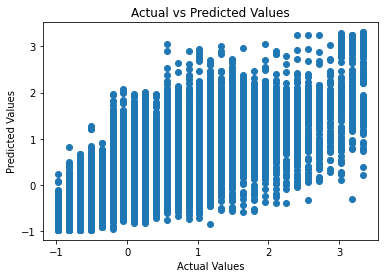

In [57]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# SVR

In [30]:
from sklearn.svm import SVR

In [31]:
# Training the SVR model on the Training set
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train, Y_train)

C:\Users\91773\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [32]:
y_pred = regressor.predict(X_test)

In [33]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, y_pred) 
print('R2 score is', r2)

R2 score is 0.613895601723329


In [34]:
print(metrics.mean_squared_error(Y_test, y_pred))

0.3863265688515724


In [35]:
from sklearn.model_selection import cross_val_score

# Assuming 'model' is already trained
scores = cross_val_score(regressor, x, y, cv=10)  # 'cv' specifies the number of folds for cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())

C:\Users\91773\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91773\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91773\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91773\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

Cross-Validation Scores: [0.61155369 0.6143892  0.6130618  0.6129836  0.60194714 0.61605885
 0.61423617 0.61221854 0.61590609 0.6087761 ]
Mean Cross-Validation Score: 0.6121131176759934
